## Final Project Submission

Please fill out:
* Student name:   ASHLEY SIMIYU
* Student pace: self paced / part time / full time     PART TIME
* Scheduled project review date/time: AUGUST 3RD 
* Instructor name: NOAH KANDIE
* Blog post URL: https://github.com/learn-co-curriculum/dsc-phase-1-project/tree/master/zippedData


DATA PREPARATION AND ANALYSIS

This section outlines how the movie revenue data was prepared for analysis. The goal was to clean and structure the data so it could support stakeholderS insights into top-performing movies and long-term trends from 2010–2018.
All data preparation steps above can be rerun using the provided dataset and code. The cleaned and aggregated data used for visualizations is derived only from code within this notebook, making the process fully reproducible for any third party.

1. https://github.com/learn-co-curriculum/dsc-phase-1-project/tree/master/zippedData to get and prepare the raw data for analysis.
2. The project used three files from the git repository and used (movie_gross_data, title_ratings_data, title_basics_data) to analyze the data needed to help the stakeholders come to find a way of how to earn more profits on movies with highest revenue.
3. To understand better, to ensure accuracy, to focus on, because it supports the objective of the project under study




In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

movie_gross_data =pd.read_csv('C://project//dsc-phase-1-project//zippedData//bom.movie_gross.csv')
movie_gross_data.head()



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
title_basic_data =pd.read_csv('C://project//dsc-phase-1-project//zippedData//title.basics.csv')
title_basic_data.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
title_ratings_data =pd.read_csv('C://project//dsc-phase-1-project//zippedData//title.ratings.csv')
title_ratings_data.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
merged_file = pd.merge(title_ratings_data,title_basic_data,on='tconst')
merged_file.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [ ]:
# Merging of data from movie_gross_data and first set of merged data
final_merged_data = pd.merge(movie_gross_data,merged_file, left_on=('title','year'),right_on=('primary_title','start_year'))
final_merged_data.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,8.3,682218,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,6.3,167532,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,5.0,211733,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,7.0,657690,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


Matplotlib is building the font cache; this may take a moment.


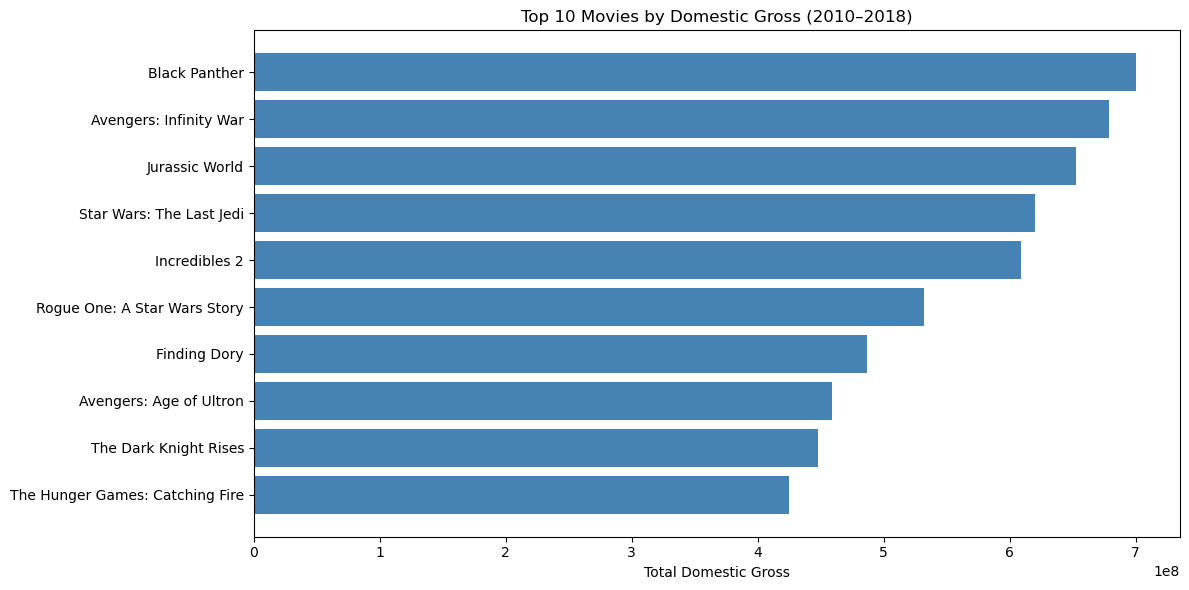

In [14]:
# Drop rows with missing values in title or domestic_gross
movies_gross_domestic = final_merged_data.dropna(subset=['title', 'domestic_gross'])

# Group by movie title and sum domestic gross over the years
total_domestic = movies_gross_domestic.groupby('title')['domestic_gross'].sum().reset_index()

# Get top 10 movies by total domestic gross
top10 = total_domestic.sort_values(by='domestic_gross', ascending=False).head(10)
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top10['title'], top10['domestic_gross'], color='steelblue')
plt.xlabel('Total Domestic Gross')
plt.title('Top 10 Movies by Domestic Gross (2010–2018)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

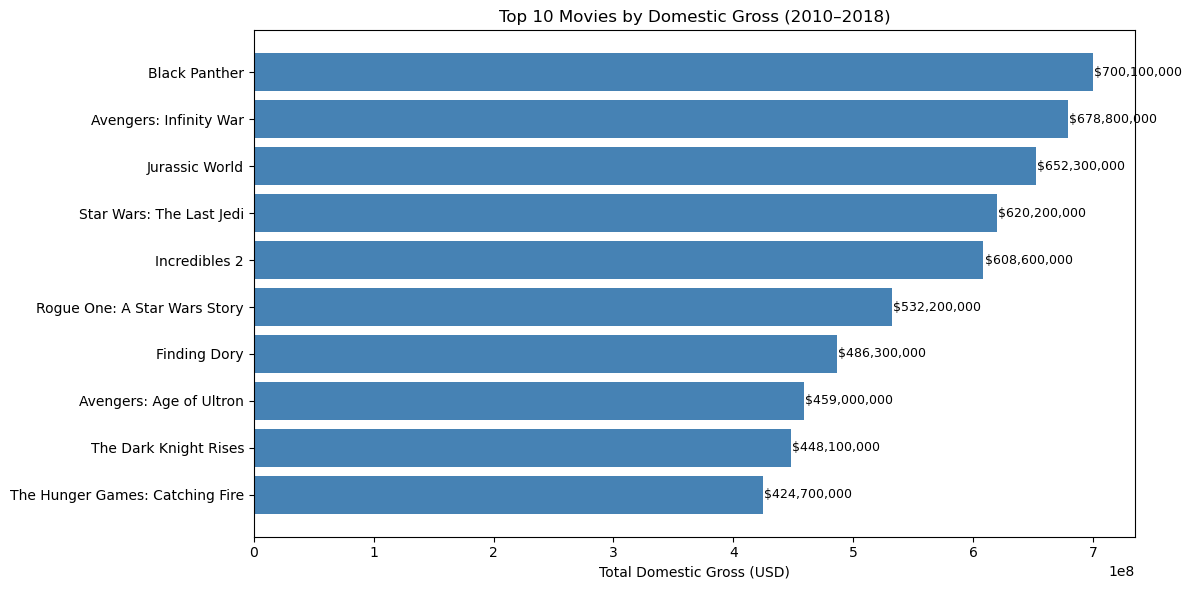

In [15]:
# Step 1: Drop rows with missing 'title' or 'domestic_gross'
movies_gross_domestic = final_merged_data.dropna(subset=['title', 'domestic_gross'])

# Step 2: Group by title and sum domestic gross
total_domestic = movies_gross_domestic.groupby('title', as_index=False)['domestic_gross'].sum()

# Step 3: Get top 10 movies by domestic gross
top10 = total_domestic.sort_values(by='domestic_gross', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top10['title'], top10['domestic_gross'], color='steelblue')

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1e6, bar.get_y() + bar.get_height() / 2,
             f"${int(width):,}", va='center', fontsize=9)

# Final touches
plt.xlabel('Total Domestic Gross (USD)')
plt.title('Top 10 Movies by Domestic Gross (2010–2018)')
plt.gca().invert_yaxis()  # So highest grossing is on top
plt.tight_layout()
plt.show()



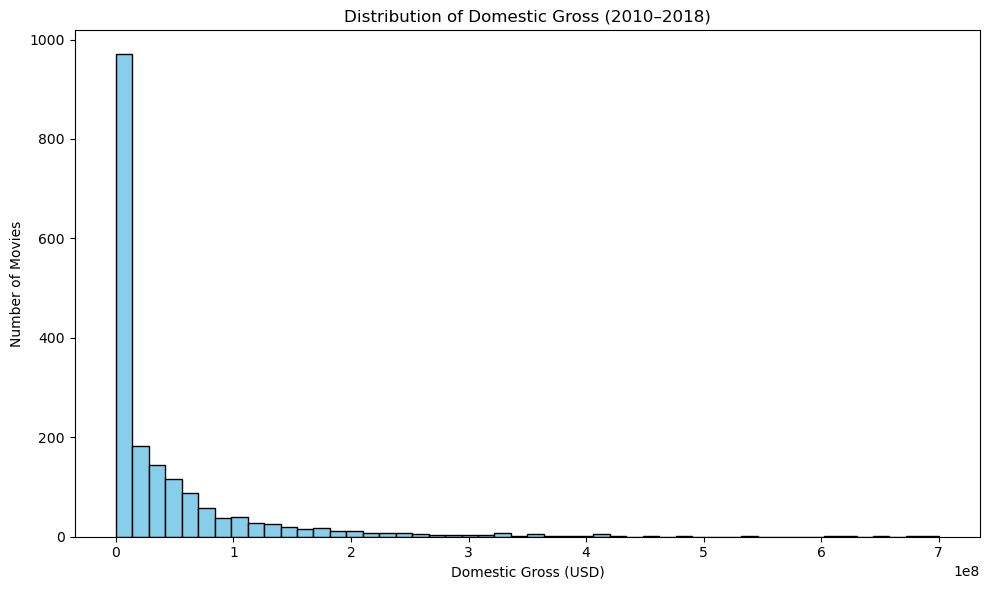

In [16]:
# Drop missing domestic gross values
domestic_gross_values = final_merged_data['domestic_gross'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(domestic_gross_values, bins=50, color='skyblue', edgecolor='black')

# Labeling
plt.xlabel('Domestic Gross (USD)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Domestic Gross (2010–2018)')
plt.tight_layout()
plt.show()